In [ ]:
import torch

inputs = torch.randn((64, 8, 3))

inputs_trans = inputs.unsqueeze(1).repeat(1,20,1,1)

inputs.shape, inputs_trans.shape

(torch.Size([64, 8, 3]), torch.Size([64, 20, 8, 3]))

In [4]:
inputs[1,1,1], inputs_trans[1,:,1,1]

(tensor(1.1130),
 tensor([1.1130, 1.1130, 1.1130, 1.1130, 1.1130, 1.1130, 1.1130, 1.1130, 1.1130,
         1.1130, 1.1130, 1.1130, 1.1130, 1.1130, 1.1130, 1.1130, 1.1130, 1.1130,
         1.1130, 1.1130]))

In [ ]:
bs = 64
n_trajs = 20
gt_trajs = torch.randn((64,8,3))# torch.Size([64, 8, 3])

plan_anchor = []
for batch in range(bs):
    random_int = torch.randint(0, n_trajs, (1,)).item()
    print(random_int)
    random_anchor = torch.randn((n_trajs, 8, 3))
    print(random_anchor[random_int])
    print(gt_trajs[batch])
    random_anchor[random_int,...] = gt_trajs[batch, ...]
    print(random_anchor[random_int])
    
    plan_anchor.append(random_anchor)

plan_anchor = torch.stack(plan_anchor, dim=0)


10
tensor([[-0.4150, -0.2200,  0.1194],
        [-2.8500, -0.9177,  1.3584],
        [-1.0407, -0.3731, -0.3053],
        [ 0.6917, -0.6286, -1.1741],
        [ 1.0143, -0.2588, -0.3359],
        [-1.3509,  0.2212,  0.1668],
        [-0.2152, -0.5169, -1.2608],
        [ 0.2624, -0.6042, -0.7131]])
tensor([[ 0.1214,  1.2621,  1.3170],
        [ 0.4434, -0.4217,  0.0060],
        [-0.3063, -0.5411,  1.0533],
        [ 1.0135, -0.0059,  0.8519],
        [ 0.4002,  0.4238,  0.4741],
        [ 2.4199,  1.5588,  1.4452],
        [-0.7867, -2.3525, -0.8101],
        [-0.0676, -1.2251,  0.0794]])
tensor([[-0.6360, -0.0055,  0.6221],
        [-1.6011, -0.0034, -1.4488],
        [-0.1892,  1.6331, -0.2028],
        [-0.6939,  0.6232,  0.5329],
        [-0.3450, -0.7781, -0.0608],
        [-0.6351, -0.2062,  0.0641],
        [-2.0519, -0.4706,  1.2630],
        [-1.7495, -0.0931, -0.0037]])
18
tensor([[-1.1591,  1.3864, -0.3089],
        [ 1.0329,  0.3612, -0.2854],
        [-0.1320, -0.2905,  0

In [8]:
import numpy as np
import torch
step_num = 2
bs = 64

# self.diffusion_scheduler.set_timesteps(1000, device)
step_ratio = 20 / step_num
n_trajs = 20
roll_timesteps = (np.arange(0, step_num) * step_ratio).round()[::-1].copy().astype(np.int64)
roll_timesteps = torch.from_numpy(roll_timesteps)

In [5]:
infer_step_num = 2
denoise_x_step_num = 0
denoise_steps = list(range(0, infer_step_num)) + [infer_step_num - 1] * denoise_x_step_num

In [6]:
denoise_steps

[0, 1]

In [18]:
total_timesteps = 1000
sampling_timesteps = 20
times = torch.linspace(-1, total_timesteps-1, steps=sampling_timesteps + 1)
times = list(reversed(times.int().tolist()))
sample_timesteps = torch.tensor(times)

dict_keys(['train_velocity_x', 'train_velocity_y', 'train_acceleration_x', 'train_acceleration_y', 'train_trajectory_x', 'train_trajectory_y', 'train_trajectory_0_x', 'train_trajectory_0_y', 'train_trajectory_1_x', 'train_trajectory_1_y', 'train_trajectory_2_x', 'train_trajectory_2_y', 'train_trajectory_3_x', 'train_trajectory_3_y', 'train_trajectory_4_x', 'train_trajectory_4_y', 'train_trajectory_5_x', 'train_trajectory_5_y', 'train_trajectory_6_x', 'train_trajectory_6_y', 'train_trajectory_7_x', 'train_trajectory_7_y'])
dict_keys(['val_velocity_x', 'val_velocity_y', 'val_acceleration_x', 'val_acceleration_y', 'val_trajectory_x', 'val_trajectory_y', 'val_trajectory_0_x', 'val_trajectory_0_y', 'val_trajectory_1_x', 'val_trajectory_1_y', 'val_trajectory_2_x', 'val_trajectory_2_y', 'val_trajectory_3_x', 'val_trajectory_3_y', 'val_trajectory_4_x', 'val_trajectory_4_y', 'val_trajectory_5_x', 'val_trajectory_5_y', 'val_trajectory_6_x', 'val_trajectory_6_y', 'val_trajectory_7_x', 'val_trajec

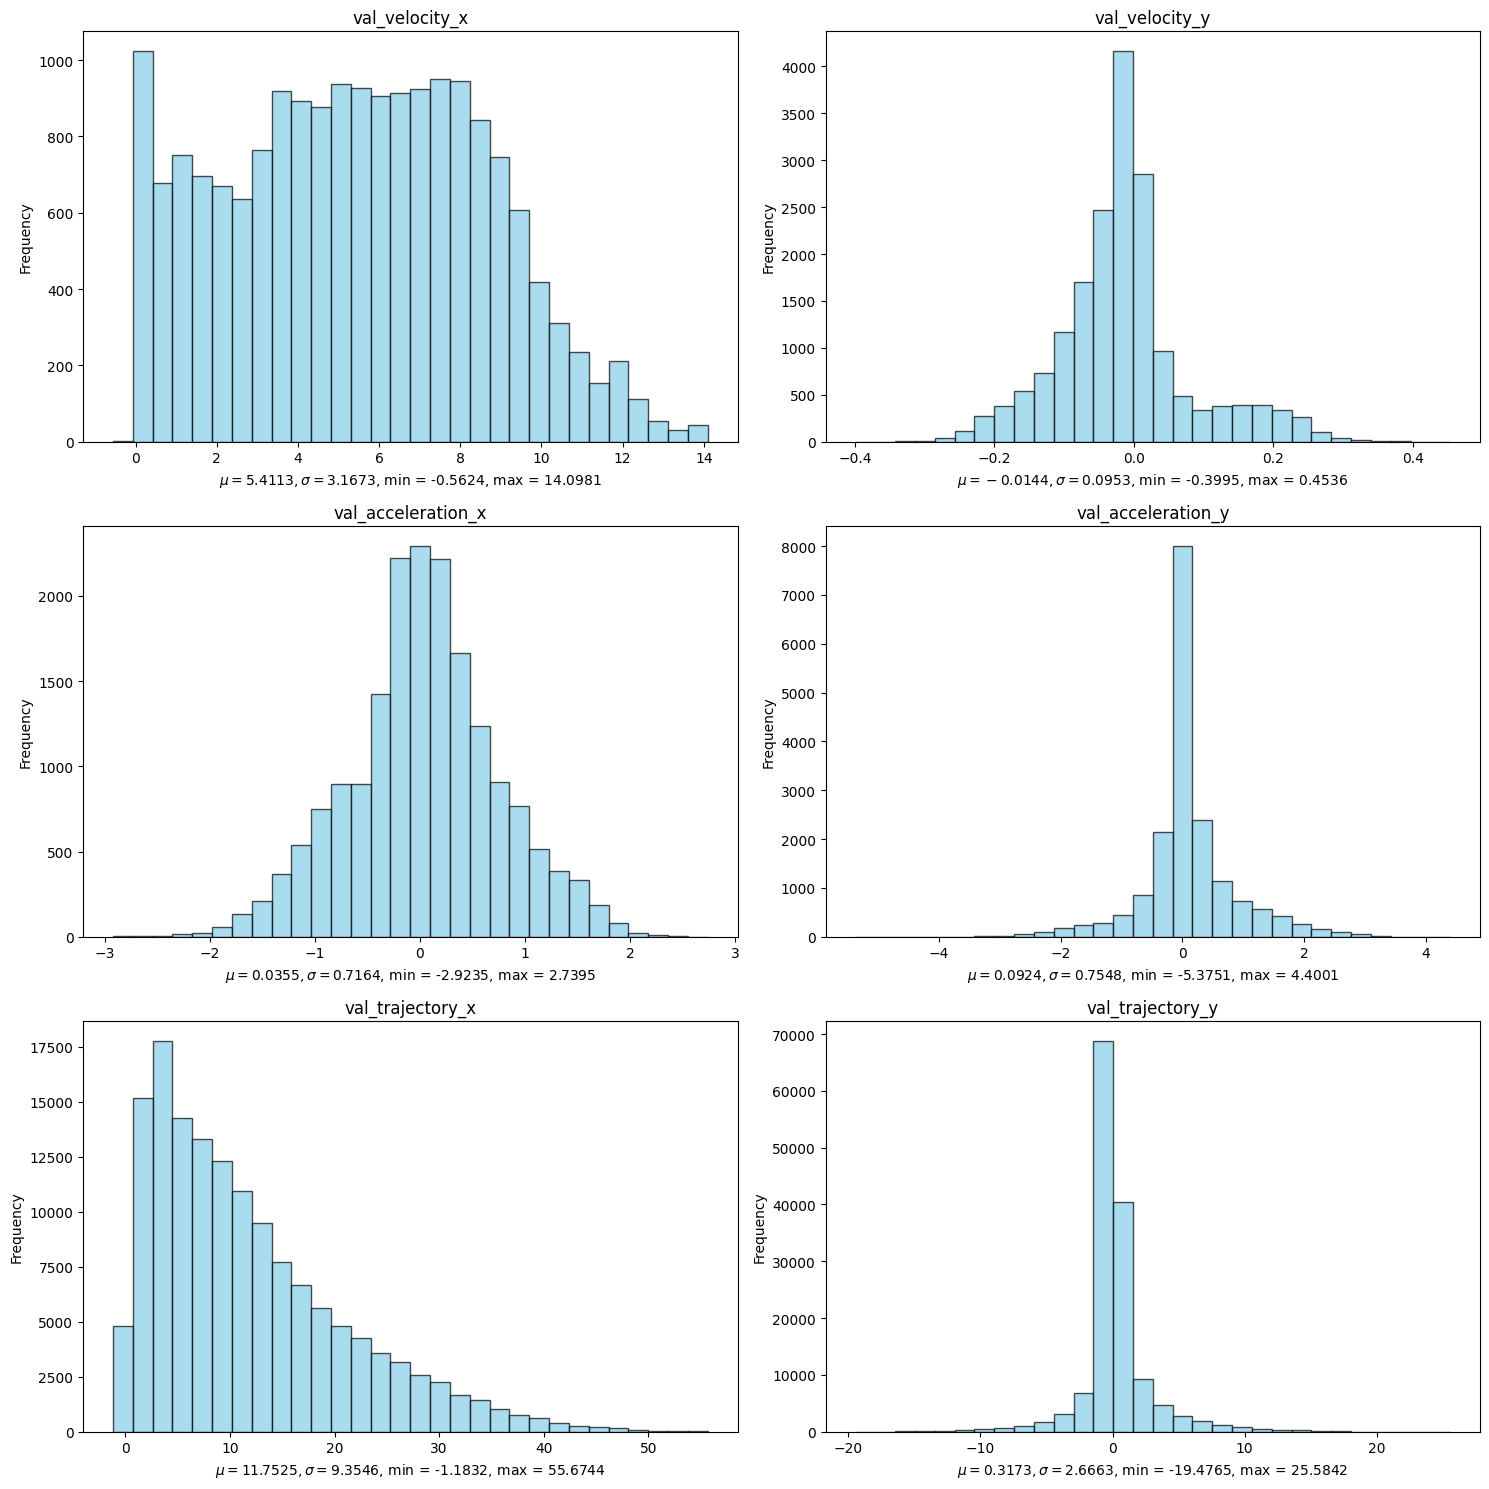

In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats

with open("tb_logs/train.pkl", "rb") as f:
    loaded_data = pickle.load(f)
print(loaded_data.keys())
with open("tb_logs/val.pkl", "rb") as f:
    val_loaded_data = pickle.load(f)
print(val_loaded_data.keys())

specified_keys =['train_velocity_x', 'train_velocity_y', 'train_acceleration_x', 'train_acceleration_y', 'train_trajectory_x', 'train_trajectory_y']
val_specified_keys = ['val_velocity_x', 'val_velocity_y', 'val_acceleration_x', 'val_acceleration_y', 'val_trajectory_x', 'val_trajectory_y']

avs_dict = {k: v for k, v in loaded_data.items() if k in specified_keys}
point_s_dict = {k: v for k, v in loaded_data.items() if k not in specified_keys}

val_avs_dict = {k: v for k, v in val_loaded_data.items() if k in val_specified_keys}

train_val_avs_dict = {  "trainval_velocity_x":np.concatenate((avs_dict['train_velocity_x'], val_avs_dict['val_velocity_x']),axis=0),
                        "trainval_velocity_y":np.concatenate((avs_dict['train_velocity_y'], val_avs_dict['val_velocity_y']),axis=0),
                        "trainval_acceleration_x":np.concatenate((avs_dict['train_acceleration_x'], val_avs_dict['val_acceleration_x']),axis=0),
                        "trainval_acceleration_y":np.concatenate((avs_dict['train_acceleration_y'], val_avs_dict['val_acceleration_y']),axis=0),
                        "trainval_trajectory_x":np.concatenate((avs_dict['train_trajectory_x'], val_avs_dict['val_trajectory_x']),axis=0),
                        "trainval_trajectory_y":np.concatenate((avs_dict['train_trajectory_y'], val_avs_dict['val_trajectory_y']),axis=0)
                        }
                      
                      

# 设置子图的行列数，确保布局合理
cols = 2 # 每行显示的子图数量
rows = 3 

# 创建大图和子图
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # 将子图展平，方便遍历
# 遍历字典，绘制每个数据的直方图
for i, (key, data) in enumerate(val_avs_dict.items()):
    ax = axes[i]  
    data = data.flatten()
    mean = np.around(np.mean(data), decimals=4)
    std = np.around(np.std(data), decimals=4)
    minimum = np.around(np.min(data), decimals=4)
    maximum = np.around(np.max(data), decimals=4)

    x = np.linspace(min(data), max(data), 1000)
    pdf = stats.norm.pdf(x, mean, std)
    # ax.plot(x, pdf, color='red', linewidth=2, label=f'N({mean:.2f}, {std:.2f}^2)')

    ax.hist(data.flatten(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(key)  # 设置子图标题
    ax.set_xlabel("$\mu = {}, \sigma = {}$, min = {}, max = {}".format(str(mean),str(std),str(minimum),str(maximum)))  # 设置 x 轴标签
    ax.set_ylabel("Frequency")  # 设置 y 轴标签


# 如果子图数量小于网格中的总数，隐藏多余的子图
for i in range(len(loaded_data), len(axes)):
    axes[i].axis('off')

# 调整布局，避免子图重叠
plt.tight_layout()
plt.savefig("val.png", dpi=800, bbox_inches='tight')
# 显示图形
plt.show()


# cols = 4 # 每行显示的子图数量
# rows = 4

# # 创建大图和子图
# fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 15))
# axes = axes.flatten()  # 将子图展平，方便遍历
# # 遍历字典，绘制每个数据的直方图
# for i, (key, data) in enumerate(point_s_dict.items()):
#     ax = axes[i]  
#     data = data.flatten()
#     mean = np.around(np.mean(data), decimals=4)
#     std = np.around(np.std(data), decimals=4)
#     minimum = np.around(np.min(data), decimals=4)
#     maximum = np.around(np.max(data), decimals=4)

#     x = np.linspace(min(data), max(data), 1000)
#     pdf = stats.norm.pdf(x, mean, std)
#     # ax.plot(x, pdf, color='red', linewidth=2, label=f'N({mean:.2f}, {std:.2f}^2)')

#     ax.hist(data.flatten(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
#     ax.set_title(key)  # 设置子图标题
#     ax.set_xlabel("$\mu = {}, \sigma = {}$, min = {}, max = {}".format(str(mean),str(std),str(minimum),str(maximum))) 
#     ax.set_ylabel("Frequency")  # 设置 y 轴标签


# # 如果子图数量小于网格中的总数，隐藏多余的子图
# for i in range(len(loaded_data), len(axes)):
#     axes[i].axis('off')

# # 调整布局，避免子图重叠
# plt.tight_layout()
# plt.savefig("train2.png", dpi=800, bbox_inches='tight')
# # 显示图形
# plt.show()


5.3899064 14.672767


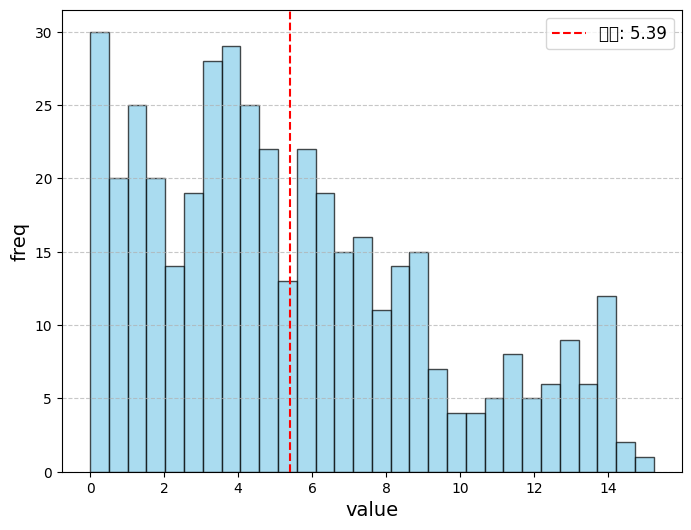

In [16]:
loaded_data['train_velocity_x'].shape
train_velocity_x = loaded_data['train_velocity_x']
mean = np.mean(train_velocity_x)
variance = np.var(train_velocity_x)
print(mean, variance)

import matplotlib.pyplot as plt
# 绘制频率分布直方图
plt.figure(figsize=(8, 6))
plt.hist(train_velocity_x, bins=30, color='skyblue', edgecolor='black', alpha=0.7)  # 直方图
# plt.title("频率分布直方图", fontsize=16)
plt.xlabel("value", fontsize=14)
plt.ylabel("freq", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(mean, color='red', linestyle='--', linewidth=1.5, label=f'均值: {mean:.2f}')
plt.legend(fontsize=12)


均值: -0.0008503103977019352
方差: 1.0000307847932302


/tmp/ipykernel_69269/1419087374.py:22: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_69269/1419087374.py:22: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_69269/1419087374.py:22: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_69269/1419087374.py:22: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_69269/1419087374.py:22: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_69269/1419087374.py:22: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_69269/1419087374.py:22: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAP

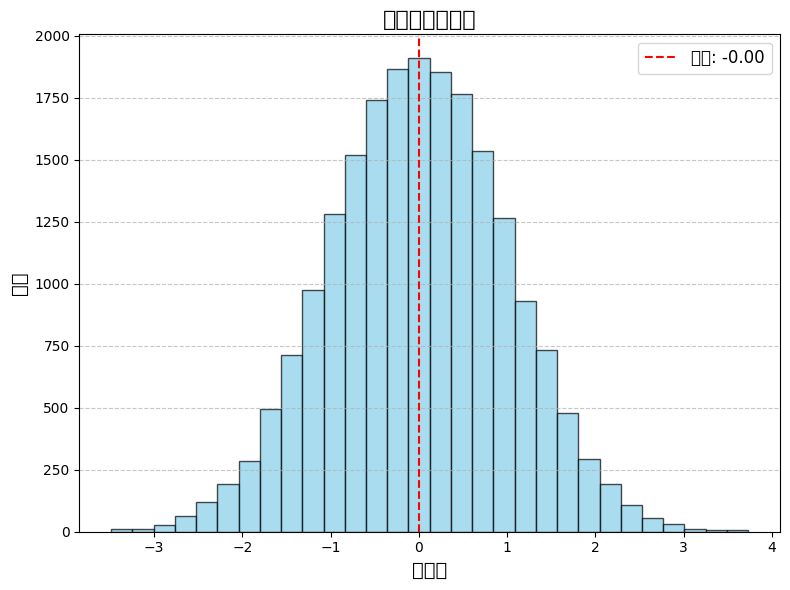

In [15]:
loaded_data['train_trajectory_x'].shape
train_trajectory_x = loaded_data['train_trajectory_x'].flatten()
mean = np.mean(train_velocity_x)
variance = np.var(train_velocity_x)
print(mean, variance)

import matplotlib.pyplot as plt
# 绘制频率分布直方图
plt.figure(figsize=(8, 6))
plt.hist(train_velocity_x, bins=30, color='skyblue', edgecolor='black', alpha=0.7)  # 直方图
# plt.title("频率分布直方图", fontsize=16)
plt.xlabel("value", fontsize=14)
plt.ylabel("freq", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(mean, color='red', linestyle='--', linewidth=1.5, label=f'均值: {mean:.2f}')
plt.legend(fontsize=12)
